In [1]:
#Linear Regression
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/home/dslab/Desktop/dataaset/lr.csv")
df

,x,y
0,2.0,45
1,4.0,23
2,3.5,67
3,2.0,70
4,1.0,20
5,2.5,54


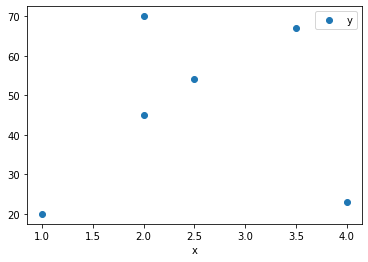

In [4]:
df.plot(x="x", y="y", style="o")
plt.show()

In [5]:
x_mean=df["x"].mean()
y_mean=df["y"].mean()
print(x_mean,y_mean)

2.5 46.5


In [6]:
df["x"]=df["x"]-x_mean
df["y"]=df["y"]-y_mean
df["x*y"]=df["x"]*df["y"]
df["x^2"]=df["x"]**2
df["y^2"]=df["y"]**2
df

,x,y,x*y,x^2,y^2
0,-0.5,-1.5,0.75,0.25,2.25
1,1.5,-23.5,-35.25,2.25,552.25
2,1.0,20.5,20.50,1.00,420.25
3,-0.5,23.5,-11.75,0.25,552.25
4,-1.5,-26.5,39.75,2.25,702.25
5,0.0,7.5,0.00,0.00,56.25


In [7]:
sum_x_y=df["x*y"].sum()
sum_x_square=df["x^2"].sum()
sum_y_square=df["y^2"].sum()
print(sum_x_y,sum_x_square,sum_y_square)

14.0 6.0 2285.5


In [8]:
correlation=sum_x_y/(sum_x_square*sum_y_square)**0.5
correlation

0.1195533631314435

In [9]:
def getmean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum=0
        for i in numbers:
            current_sum += i
            current_avg = current_sum/len(numbers)
        return current_avg

In [12]:
def getsd(numbers):
    if len(numbers)==0:
        return 0
    else:
        mean=getmean(numbers)
        sd=0
        for i in numbers:
            sd += (i-mean)**2
        return (sd/len(numbers))**0.5

In [13]:
sd_x=getsd(df["x"].tolist())
sd_y=getsd(df["y"].tolist())
print(sd_x,sd_y)

1.0 19.517086531208154


In [14]:
m=correlation*(sd_x/sd_y)
m

0.0061255742725880545

In [16]:
c=df["y"].mean()-m*df["x"].mean()
c

0.0

In [17]:
df["y_prd"]=m*df["x"]+c
df

,x,y,x*y,x^2,y^2,y_prd
0,-0.5,-1.5,0.75,0.25,2.25,-0.003063
1,1.5,-23.5,-35.25,2.25,552.25,0.009188
2,1.0,20.5,20.50,1.00,420.25,0.006126
3,-0.5,23.5,-11.75,0.25,552.25,-0.003063
4,-1.5,-26.5,39.75,2.25,702.25,-0.009188
5,0.0,7.5,0.00,0.00,56.25,0.000000


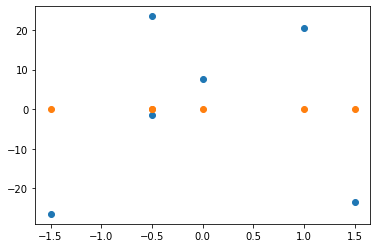

In [18]:
pt1=plt.scatter(df["x"],df["y"])
pt2=plt.scatter(df["x"],df["y_prd"])
plt.show()